In [1]:
%matplotlib inline
import cv2
import gdal 
import ogr, osr
import numpy as np
import geopandas as gpd
import os, time
import unittest
import shutil
import pandas as pd
from collections import Counter
from shapely.geometry import Polygon
from SplittedImage.SplittedImage import SplittedImage

from PIL import Image
import matplotlib.pyplot as plt


In [2]:
src_path = "../../data/Sentinel-2/farm/YL20181Rice.shp"
ref_path = "../../data/Sentinel-2/projected_tif/T50QRM_20180322T022651_B2348.tif"
target_tif_path = "../test.tif"
target_tif_save_dir = "./split_gt_tif/"
image_tif_save_dir = "./split_or_tif/"
os.makedirs(target_tif_save_dir, exist_ok=True)
os.makedirs(image_tif_save_dir, exist_ok=True)
box_size = 128

In [3]:
ds = gdal.Open(target_tif_path)
img_src_arr = np.expand_dims(ds.ReadAsArray(), 0)
X = np.transpose(img_src_arr, axes=[1,2,0])
splitted_gt = SplittedImage(X, box_size, ds.GetGeoTransform(), ds.GetProjection())
# splitted_gt.write_splitted_images(target_tif_save_dir, 'P0015913_SP5_006_001_002_021_002_005')

In [4]:
ds = gdal.Open(ref_path)
img_src_arr = ds.ReadAsArray()
X = np.transpose(img_src_arr, axes=[1,2,0])
splitted_im = SplittedImage(X, box_size, ds.GetGeoTransform(), ds.GetProjection())
splitted_im.write_splitted_images(image_tif_save_dir, 'P0015913_SP5_006_001_002_021_002_005')

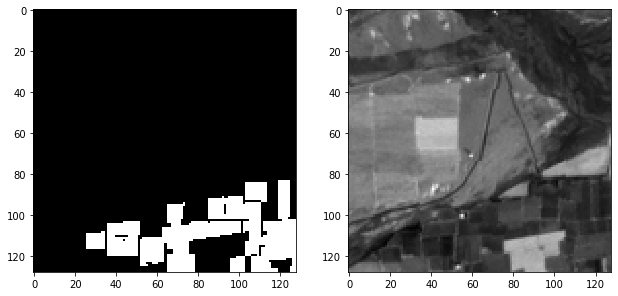

In [5]:
# just using one channel to check image pair
plt.figure(figsize=(16,8))
img_arr = plt.imread("./split_gt_tif/P0015913_SP5_006_001_002_021_002_005_4307_048_035.tif")
img_arr = img_arr[:,:,0]*255
#view image
plt.subplot(131)
plt.imshow(img_arr, "gray")
plt.subplot(132)
plt.imshow(splitted_im[48,35][...,0], "gray")

In [6]:
for r_id in range(splitted_gt.shape[0]):
    for c_id in range(splitted_gt.shape[1]):
        if splitted_gt[r_id, c_id].max() != 0:
            print(r_id, c_id)

48 35
48 36
48 37
48 38
48 39
49 27
49 29
49 30
49 32
49 33
49 34
49 35
49 36
49 37
49 38
49 39
49 40
49 41
50 25
50 26
50 27
50 28
50 29
50 30
50 31
50 32
50 33
50 34
50 35
50 36
50 37
50 38
50 39
50 40
50 41
50 42
50 43
50 44
50 45
51 25
51 26
51 27
51 28
51 29
51 30
51 31
51 32
51 33
51 34
51 35
51 36
51 37
51 38
51 39
51 40
51 41
51 42
51 43
51 44
51 45
51 46
51 47
51 48
51 49
51 50
51 51
52 24
52 25
52 26
52 27
52 28
52 29
52 30
52 31
52 32
52 33
52 34
52 35
52 36
52 37
52 38
52 39
52 40
52 41
52 42
52 43
52 44
52 45
52 46
52 47
52 48
52 49
52 50
52 51
52 52
52 53
52 54
52 55
52 56
53 24
53 25
53 26
53 27
53 28
53 29
53 30
53 31
53 32
53 33
53 34
53 35
53 36
53 37
53 38
53 39
53 40
53 41
53 42
53 43
53 44
53 45
53 46
53 47
53 48
53 49
53 50
53 51
53 52
53 53
53 54
53 55
53 56
54 23
54 24
54 25
54 26
54 27
54 28
54 29
54 30
54 31
54 32
54 33
54 34
54 35
54 36
54 37
54 38
54 39
54 40
54 41
54 42
54 43
54 44
54 45
54 46
54 47
54 48
54 49
54 50
54 51
54 52
54 53
54 54
55 23
55 24
55 2